In [37]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

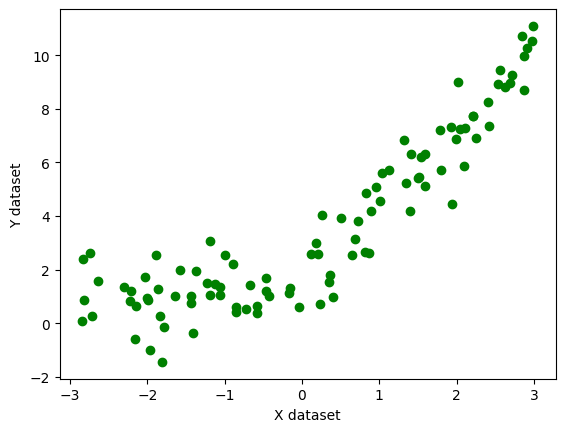

In [38]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers

plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [41]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [42]:
from sklearn.metrics import r2_score
y_pred=regression_1.predict(X_test) # testing the 'regression_1' model we built on X test/ input feature to get output feature 'y_pred'
score=r2_score(y_test,y_pred)
print(score) # 82%

0.8202441386865116


Text(0, 0.5, 'Y')

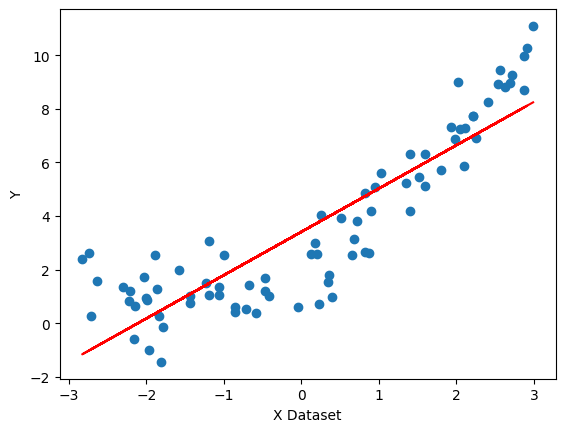

In [43]:
## Lets visualize this model
plt.plot(X_train,regression_1.predict(X_train),color='r')  # plotting x train values against model predicted values for X train - red line --actual vs pred
plt.scatter(X_train,y_train) # plotting original training set data points to check how predicted best fit line looks against it
plt.xlabel("X Dataset")
plt.ylabel("Y")


In [44]:
#Polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures to increase the degree

In [45]:
poly=PolynomialFeatures(degree=2,include_bias=True) #include bias
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test) #only transform here, because if we do fit_transform again here, it will lead to data leakage.

We apply fit_transform to the training data and only transform to the test data for independent variables to prevent data leakage and ensure the model learns from the training data alone.

The fit step of the process calculates the parameters needed for a transformation based only on the training data. For example:
Scaling: When using a scaler (like StandardScaler), fit calculates the mean and standard deviation of the training set.

Encoding: When using an encoder (like OneHotEncoder), fit identifies all unique categories present in the training data.

The transform step then applies these calculated parameters to the data. Using fit_transform simultaneously learns the parameters from the training set and applies the transformation to that same set.

In [46]:
X_train_poly #1, x1, x1^2

array([[ 1.00000000e+00, -8.54377811e-01,  7.29961443e-01],
       [ 1.00000000e+00, -1.22459457e+00,  1.49963186e+00],
       [ 1.00000000e+00, -2.15346559e+00,  4.63741404e+00],
       [ 1.00000000e+00,  6.84415761e-01,  4.68424934e-01],
       [ 1.00000000e+00,  2.68511734e+00,  7.20985512e+00],
       [ 1.00000000e+00,  2.54757021e-01,  6.49011398e-02],
       [ 1.00000000e+00,  1.17508126e-01,  1.38081598e-02],
       [ 1.00000000e+00,  2.03030391e-01,  4.12213395e-02],
       [ 1.00000000e+00, -1.77897790e+00,  3.16476238e+00],
       [ 1.00000000e+00,  2.87037331e+00,  8.23904296e+00],
       [ 1.00000000e+00,  2.04854231e+00,  4.19652559e+00],
       [ 1.00000000e+00,  8.67548674e-01,  7.52640701e-01],
       [ 1.00000000e+00, -2.63875776e+00,  6.96304251e+00],
       [ 1.00000000e+00,  1.51382185e+00,  2.29165659e+00],
       [ 1.00000000e+00, -9.93742401e-01,  9.87523960e-01],
       [ 1.00000000e+00,  1.34656969e+00,  1.81324993e+00],
       [ 1.00000000e+00,  8.15644379e-01

In [48]:
#Similarly
X_test_poly

array([[ 1.        , -0.5750308 ,  0.33066042],
       [ 1.        ,  1.54359287,  2.38267894],
       [ 1.        ,  1.78477312,  3.18541508],
       [ 1.        , -1.64056165,  2.69144251],
       [ 1.        ,  2.8492329 ,  8.1181281 ],
       [ 1.        , -0.16766383,  0.02811116],
       [ 1.        , -1.36622588,  1.86657315],
       [ 1.        , -0.89410957,  0.79943191],
       [ 1.        ,  2.97348656,  8.84162233],
       [ 1.        ,  1.32364611,  1.75203904],
       [ 1.        , -0.15425188,  0.02379364],
       [ 1.        ,  2.42203648,  5.86626072],
       [ 1.        , -2.81303229,  7.91315067],
       [ 1.        ,  1.0126605 ,  1.02548128],
       [ 1.        ,  1.12028943,  1.2550484 ],
       [ 1.        ,  1.93661344,  3.75047161],
       [ 1.        ,  1.50302311,  2.25907847],
       [ 1.        , -1.41294001,  1.99639948],
       [ 1.        , -2.84107202,  8.0716902 ],
       [ 1.        , -1.12460296,  1.26473181]])

In [49]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8994548599947085


In [50]:
print(regression.coef_)

[[0.         1.49543408 0.45722747]]


In [51]:
print(regression.intercept_)

[2.04613857]


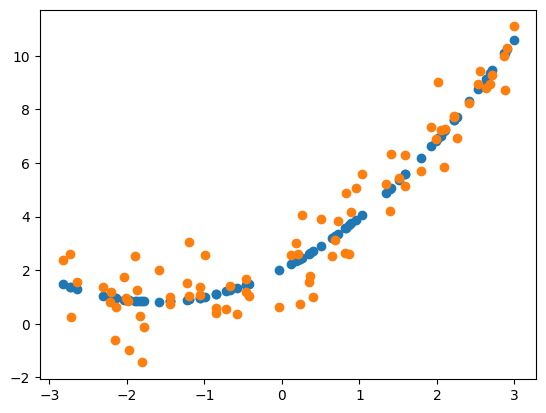

In [52]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [53]:
#Now, we increase the degree to 3 instead of 2 earlier
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [54]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8951229347239474


In [31]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

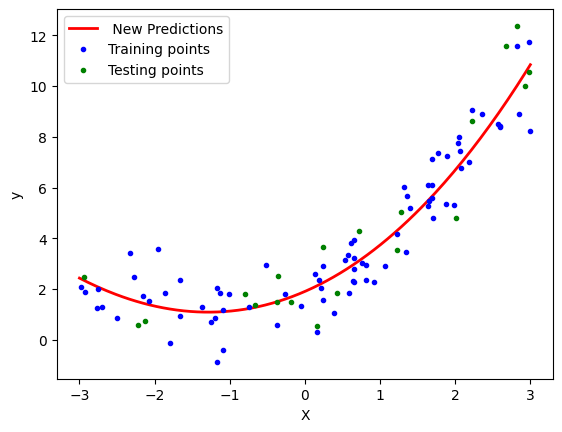

In [32]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipeline Concepts

In [28]:
from sklearn.pipeline import Pipeline

In [68]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## polynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    print(r2_score(y_test,y_pred))


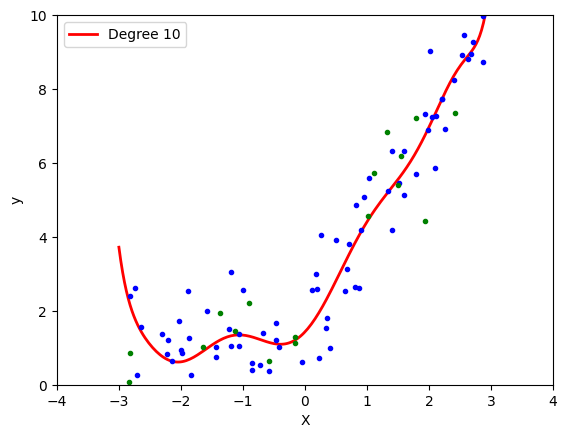

0.8951229347239474


In [72]:
poly_regression(10)

In [74]:
X_train

array([[-0.85437781],
       [-1.22459457],
       [-2.15346559],
       [ 0.68441576],
       [ 2.68511734],
       [ 0.25475702],
       [ 0.11750813],
       [ 0.20303039],
       [-1.7789779 ],
       [ 2.87037331],
       [ 2.04854231],
       [ 0.86754867],
       [-2.63875776],
       [ 1.51382185],
       [-0.9937424 ],
       [ 1.34656969],
       [ 0.81564438],
       [ 0.23119945],
       [-1.43765386],
       [ 0.65045475],
       [-2.73466761],
       [ 0.71904924],
       [ 0.3994594 ],
       [-1.57972615],
       [ 1.40590765],
       [-1.43758923],
       [ 1.59153696],
       [-2.71453104],
       [ 2.09344394],
       [ 1.02893278],
       [ 2.56158633],
       [ 1.92968736],
       [-0.03936753],
       [ 2.53366379],
       [ 1.79398226],
       [ 2.21409471],
       [ 0.3476984 ],
       [ 2.1085936 ],
       [ 1.39937281],
       [-2.00531139],
       [-1.05903845],
       [-1.89144223],
       [ 0.82315885],
       [ 0.95239977],
       [-2.03072342],
       [ 2